# Import data

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from utils import get_train_data_only

df_teams, df_BLUE, df_RED = get_train_data_only()

In [48]:
#How many data points we have
len(df_teams), len(df_BLUE) 

(28254, 141270)

In [49]:
df_teams.head()

,id,start,patch,winner,duration,teams.BLUE.name,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,teams.BLUE.total_rift_herald_kills,teams.BLUE.total_dragon_kills,teams.BLUE.total_baron_kills,teams.BLUE.side,teams.RED.name,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.side,year
31563,LMS/2016 Season/Spring Season/Scoreboards_3_2,None,5.24,BLUE,1486,Hong Kong Esports,10,1,2,3,1,BLUE,Midnight Sun Esports,2,0,0,0,0,RED,2015
31596,LJL/2016 Season/Spring Season/Scoreboards_1_2,None,5.24,RED,2108,Unsold Stuff Gaming,3,0,1,1,0,BLUE,7th heaven,10,3,0,4,1,RED,2015
31595,LJL/2016 Season/Spring Season/Scoreboards_1_1,None,5.24,RED,2319,7th heaven,5,0,1,0,0,BLUE,Unsold Stuff Gaming,10,2,0,5,2,RED,2015
31588,CBLOL/2016 Season/Split 1/Scoreboards_2_2,None,5.24,BLUE,2535,Operation Kino e-Sports,8,1,0,1,2,BLUE,CNB e-Sports Club,9,1,1,4,0,RED,2015
31587,CBLOL/2016 Season/Split 1/Scoreboards_2_1,None,5.24,RED,4397,CNB e-Sports Club,11,5,1,5,3,BLUE,Operation Kino e-Sports,9,1,0,5,1,RED,2015


In [50]:
df_RED.head()


,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id
0,DreamSha,153644.0,TOP,Malphite,54,4154.0,1.0,2.0,6938,146,0,8,1,2,10936,60317,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,Wulala,204863.0,JGL,Kindred,203,4021.0,2.0,4.0,6906,79,1,56,1,4,15407,72096,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,Mission,180941.0,MID,Kassadin,38,4944.0,1.0,3.0,7819,178,1,4,0,3,14777,84528,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,Payne,192390.0,BOT,Tristana,18,4197.0,0.0,3.0,7731,185,0,5,0,3,12551,89701,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,SkuLL,197834.0,SUP,Alistar,12,2726.0,1.0,7.0,4986,19,0,0,1,7,19427,8778,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2


# Feature Engineering

In [79]:
import numpy as np
import pandas as pd

In [80]:
df_b = df_BLUE.groupby('champion_id').count()
df_r = df_RED.groupby('champion_id').count()
df_frequency = pd.DataFrame(df_b.max(axis=1), columns=['champ_id_blue'])
df_frequency['champ_id_red'] = df_r.max(axis=1)
df_frequency.sample(5)

,champ_id_blue,champ_id_red
champion_id,,
69,1326,1548
3,1710,1525
83,181,260
876,273,210
51,1881,1662


<AxesSubplot:xlabel='champion_id'>

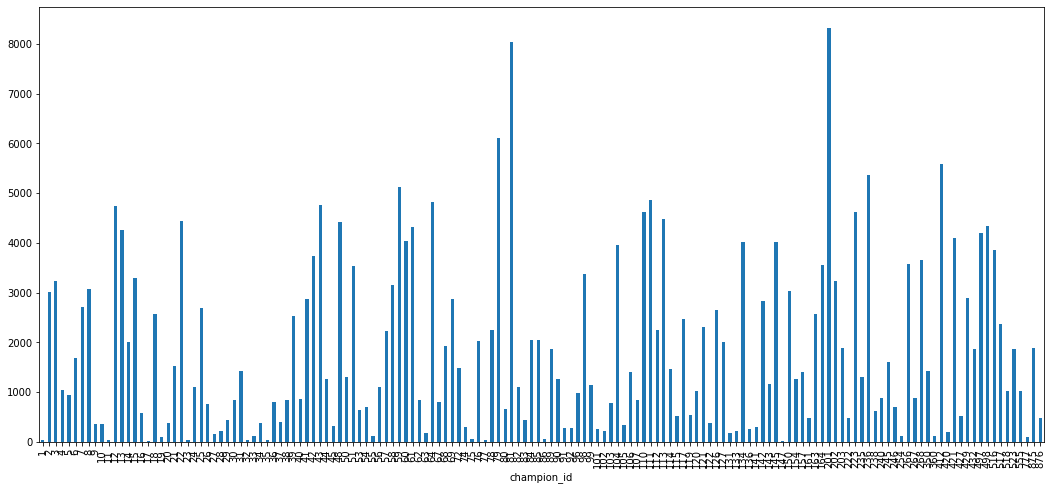

In [81]:
#total times a champion played
df_frequency.sum(axis=1).plot.bar(figsize=(18,8))

In [82]:
min_played = df_frequency.sum(axis=1).min()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == min_played]

champion_id
147    16
dtype: int64

In [83]:
max_played = df_frequency.sum(axis=1).max()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == max_played]

champion_id
201    8327
dtype: int64

## Synergy between champions in the same team

In [84]:
df_BLUE_lite_synergy = df_BLUE[['champion_id', 'win', 'game_id']]
df_BLUE_lite_synergy

,champion_id,win,game_id
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
141265,516,False,LCL/2020 Season/Spring Season/Scoreboards_2_1
141266,59,False,LCL/2020 Season/Spring Season/Scoreboards_2_1
141267,142,False,LCL/2020 Season/Spring Season/Scoreboards_2_1
141268,81,False,LCL/2020 Season/Spring Season/Scoreboards_2_1


In [85]:
df_RED_lite_synergy = df_RED[['champion_id', 'win', 'game_id']]
df_RED_lite_synergy

,champion_id,win,game_id
0,54,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,203,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,38,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,18,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,12,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
141265,875,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141266,64,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141267,131,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141268,523,True,LCL/2020 Season/Spring Season/Scoreboards_2_1


In [86]:
df_result = pd.concat([df_BLUE_lite_synergy, df_RED_lite_synergy])
df_result

,champion_id,win,game_id
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
141265,875,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141266,64,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141267,131,True,LCL/2020 Season/Spring Season/Scoreboards_2_1
141268,523,True,LCL/2020 Season/Spring Season/Scoreboards_2_1


In [87]:
df_result['outcome'] = df_result['win']*1
df_result

,champion_id,win,game_id,outcome
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
...,...,...,...,...
141265,875,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1
141266,64,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1
141267,131,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1
141268,523,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1


In [88]:
df_result.index = df_result.game_id
df_result

,champion_id,win,game_id,outcome
game_id,,,,
LMS/2016 Season/Spring Season/Scoreboards_3_2,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
...,...,...,...,...
LCL/2020 Season/Spring Season/Scoreboards_2_1,875,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1
LCL/2020 Season/Spring Season/Scoreboards_2_1,64,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1
LCL/2020 Season/Spring Season/Scoreboards_2_1,131,True,LCL/2020 Season/Spring Season/Scoreboards_2_1,1


In [89]:
game_id_unique = np.unique(df_result.game_id)
len(game_id_unique)

28254

In [90]:
champions_id_unique = np.unique(df_result.champion_id)
champions_id_unique, len(champions_id_unique) 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  67,  68,  69,  72,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  89,
         90,  91,  92,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
        110, 111, 112, 113, 114, 115, 117, 119, 120, 121, 122, 126, 127,
        131, 133, 134, 136, 141, 142, 143, 145, 147, 150, 154, 157, 161,
        163, 164, 201, 202, 203, 222, 223, 235, 236, 238, 240, 245, 246,
        254, 266, 267, 268, 350, 360, 412, 420, 421, 427, 429, 432, 497,
        498, 516, 517, 518, 523, 555, 777, 875, 876]),
 152)

In [91]:
champions_won_together = pd.DataFrame(np.zeros([len(champions_id_unique), len(champions_id_unique)]), columns=champions_id_unique, index=champions_id_unique)
champions_won_together

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
champions_play_together = pd.DataFrame(np.zeros([len(champions_id_unique), len(champions_id_unique)]), columns=champions_id_unique, index=champions_id_unique)
champions_play_together

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
game_id_unique[:1]

array(['2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1'],
      dtype=object)

In [94]:
from tqdm import tqdm

##remove data that is faulty, champions playing in the red and blue team simultaneously in a game
count = 0
for game in tqdm(game_id_unique):
    value = list(df_result.loc[game, 'champion_id'])
    unique_champions_per_game = set(value)
    if len(unique_champions_per_game) == 10:
        continue
    else:
        print(game)
        print(value)

In [95]:
for champion_a in tqdm(champions_id_unique):
    champions_played_together_list = list(df_result.loc[df_result[df_result.champion_id == champion_a].index]['champion_id'])
    for champion_b in champions_played_together_list:
        if champion_a == champion_b:
            continue
        else:
            champions_play_together.loc[champion_a][champion_b] += 1

100%|██████████████████████████████████████████████████████████████| 152/152 [03:48<00:00,  1.51s/it]


In [96]:
#number of times that champions played together
champions_play_together

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,0.0,4.0,3.0,2.0,1.0,2.0,4.0,0.0,2.0,1.0,...,6.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,2.0,0.0
2,4.0,0.0,352.0,94.0,56.0,227.0,304.0,317.0,26.0,61.0,...,458.0,558.0,499.0,295.0,160.0,220.0,101.0,3.0,171.0,15.0
3,3.0,352.0,0.0,91.0,137.0,287.0,258.0,410.0,43.0,50.0,...,553.0,580.0,374.0,268.0,105.0,169.0,73.0,8.0,165.0,62.0
4,2.0,94.0,91.0,0.0,12.0,35.0,37.0,50.0,13.0,17.0,...,105.0,75.0,175.0,106.0,22.0,191.0,41.0,1.0,163.0,41.0
5,1.0,56.0,137.0,12.0,0.0,244.0,129.0,136.0,28.0,7.0,...,212.0,178.0,125.0,79.0,39.0,8.0,61.0,3.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,1.0,220.0,169.0,191.0,8.0,49.0,211.0,94.0,32.0,37.0,...,154.0,82.0,597.0,152.0,12.0,0.0,25.0,3.0,538.0,26.0
555,3.0,101.0,73.0,41.0,61.0,68.0,98.0,135.0,29.0,7.0,...,100.0,152.0,98.0,158.0,115.0,25.0,0.0,0.0,36.0,6.0
777,2.0,3.0,8.0,1.0,3.0,2.0,1.0,6.0,1.0,5.0,...,18.0,1.0,24.0,12.0,0.0,3.0,0.0,0.0,10.0,33.0
875,2.0,171.0,165.0,163.0,9.0,42.0,182.0,85.0,34.0,41.0,...,190.0,112.0,469.0,153.0,15.0,538.0,36.0,10.0,0.0,124.0


In [97]:
for champ_a in tqdm(champions_id_unique):
    champ_played_together_won_list = list(df_result.loc[df_result[(df_result.champion_id == champ_a) & (df_result.outcome == 1)].index]['champion_id'])
    for champ_b in champ_played_together_won_list:
        if champ_a == champ_b:
            continue
        else:
            champions_won_together.loc[champ_a][champ_b] += 1

100%|██████████████████████████████████████████████████████████████| 152/152 [01:52<00:00,  1.35it/s]


In [98]:
##number of times that champions played and won together
champions_won_together

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,...,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,2.0,0.0,178.0,51.0,36.0,121.0,172.0,170.0,15.0,30.0,...,236.0,268.0,248.0,157.0,89.0,105.0,52.0,1.0,85.0,12.0
3,1.0,171.0,0.0,34.0,63.0,137.0,129.0,216.0,27.0,22.0,...,266.0,287.0,187.0,137.0,51.0,81.0,34.0,5.0,83.0,26.0
4,1.0,50.0,60.0,0.0,3.0,14.0,22.0,31.0,7.0,5.0,...,53.0,41.0,99.0,65.0,11.0,109.0,27.0,0.0,102.0,20.0
5,1.0,21.0,58.0,6.0,0.0,115.0,68.0,64.0,12.0,5.0,...,90.0,82.0,50.0,38.0,14.0,3.0,33.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.0,110.0,93.0,110.0,1.0,27.0,125.0,47.0,17.0,17.0,...,81.0,49.0,317.0,88.0,5.0,0.0,15.0,1.0,285.0,12.0
555,1.0,50.0,28.0,14.0,34.0,37.0,50.0,64.0,20.0,4.0,...,46.0,69.0,47.0,67.0,55.0,5.0,0.0,0.0,14.0,4.0
777,1.0,2.0,5.0,1.0,3.0,1.0,0.0,3.0,0.0,2.0,...,10.0,1.0,12.0,8.0,0.0,3.0,0.0,0.0,6.0,22.0
875,2.0,96.0,84.0,81.0,6.0,22.0,104.0,48.0,16.0,24.0,...,93.0,57.0,247.0,75.0,11.0,297.0,12.0,3.0,0.0,64.0


In [99]:
champions_won_percentage = champions_won_together.div(champions_play_together)
champions_won_percentage

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,NaN,0.250000,0.000000,0.500000,1.000000,1.000000,0.250000,NaN,0.500000,1.000000,...,0.500000,0.500000,0.000000,0.333333,0.000000,1.000000,0.000000,1.000000,0.000000,NaN
2,0.500000,NaN,0.505682,0.542553,0.642857,0.533040,0.565789,0.536278,0.576923,0.491803,...,0.515284,0.480287,0.496994,0.532203,0.556250,0.477273,0.514851,0.333333,0.497076,0.800000
3,0.333333,0.485795,NaN,0.373626,0.459854,0.477352,0.500000,0.526829,0.627907,0.440000,...,0.481013,0.494828,0.500000,0.511194,0.485714,0.479290,0.465753,0.625000,0.503030,0.419355
4,0.500000,0.531915,0.659341,NaN,0.250000,0.400000,0.594595,0.620000,0.538462,0.294118,...,0.504762,0.546667,0.565714,0.613208,0.500000,0.570681,0.658537,0.000000,0.625767,0.487805
5,1.000000,0.375000,0.423358,0.500000,NaN,0.471311,0.527132,0.470588,0.428571,0.714286,...,0.424528,0.460674,0.400000,0.481013,0.358974,0.375000,0.540984,0.666667,0.222222,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.000000,0.500000,0.550296,0.575916,0.125000,0.551020,0.592417,0.500000,0.531250,0.459459,...,0.525974,0.597561,0.530988,0.578947,0.416667,NaN,0.600000,0.333333,0.529740,0.461538
555,0.333333,0.495050,0.383562,0.341463,0.557377,0.544118,0.510204,0.474074,0.689655,0.571429,...,0.460000,0.453947,0.479592,0.424051,0.478261,0.200000,NaN,NaN,0.388889,0.666667
777,0.500000,0.666667,0.625000,1.000000,1.000000,0.500000,0.000000,0.500000,0.000000,0.400000,...,0.555556,1.000000,0.500000,0.666667,NaN,1.000000,NaN,NaN,0.600000,0.666667
875,1.000000,0.561404,0.509091,0.496933,0.666667,0.523810,0.571429,0.564706,0.470588,0.585366,...,0.489474,0.508929,0.526652,0.490196,0.733333,0.552045,0.333333,0.300000,NaN,0.516129


In [117]:
from sklearn.impute import SimpleImputer

impute_nan = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.5)
champions_won_percentage_imputed = pd.DataFrame(impute_nan.fit(champions_won_percentage).transform(champions_won_percentage), columns=champions_id_unique, index=champions_id_unique)
champions_won_percentage_imputed

,1,2,3,4,5,6,7,8,9,10,...,497,498,516,517,518,523,555,777,875,876
1,0.500000,0.250000,0.000000,0.500000,1.000000,1.000000,0.250000,0.500000,0.500000,1.000000,...,0.500000,0.500000,0.000000,0.333333,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000
2,0.500000,0.500000,0.505682,0.542553,0.642857,0.533040,0.565789,0.536278,0.576923,0.491803,...,0.515284,0.480287,0.496994,0.532203,0.556250,0.477273,0.514851,0.333333,0.497076,0.800000
3,0.333333,0.485795,0.500000,0.373626,0.459854,0.477352,0.500000,0.526829,0.627907,0.440000,...,0.481013,0.494828,0.500000,0.511194,0.485714,0.479290,0.465753,0.625000,0.503030,0.419355
4,0.500000,0.531915,0.659341,0.500000,0.250000,0.400000,0.594595,0.620000,0.538462,0.294118,...,0.504762,0.546667,0.565714,0.613208,0.500000,0.570681,0.658537,0.000000,0.625767,0.487805
5,1.000000,0.375000,0.423358,0.500000,0.500000,0.471311,0.527132,0.470588,0.428571,0.714286,...,0.424528,0.460674,0.400000,0.481013,0.358974,0.375000,0.540984,0.666667,0.222222,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.000000,0.500000,0.550296,0.575916,0.125000,0.551020,0.592417,0.500000,0.531250,0.459459,...,0.525974,0.597561,0.530988,0.578947,0.416667,0.500000,0.600000,0.333333,0.529740,0.461538
555,0.333333,0.495050,0.383562,0.341463,0.557377,0.544118,0.510204,0.474074,0.689655,0.571429,...,0.460000,0.453947,0.479592,0.424051,0.478261,0.200000,0.500000,0.500000,0.388889,0.666667
777,0.500000,0.666667,0.625000,1.000000,1.000000,0.500000,0.000000,0.500000,0.000000,0.400000,...,0.555556,1.000000,0.500000,0.666667,0.500000,1.000000,0.500000,0.500000,0.600000,0.666667
875,1.000000,0.561404,0.509091,0.496933,0.666667,0.523810,0.571429,0.564706,0.470588,0.585366,...,0.489474,0.508929,0.526652,0.490196,0.733333,0.552045,0.333333,0.300000,0.500000,0.516129


In [118]:
#check that there is no division by zero
np.isinf(champions_won_percentage_imputed).values.sum()

0

In [119]:
np.isnan(champions_won_percentage_imputed).values.sum(), np.isnan(champions_won_percentage).values.sum()

(0, 1482)

<AxesSubplot:>

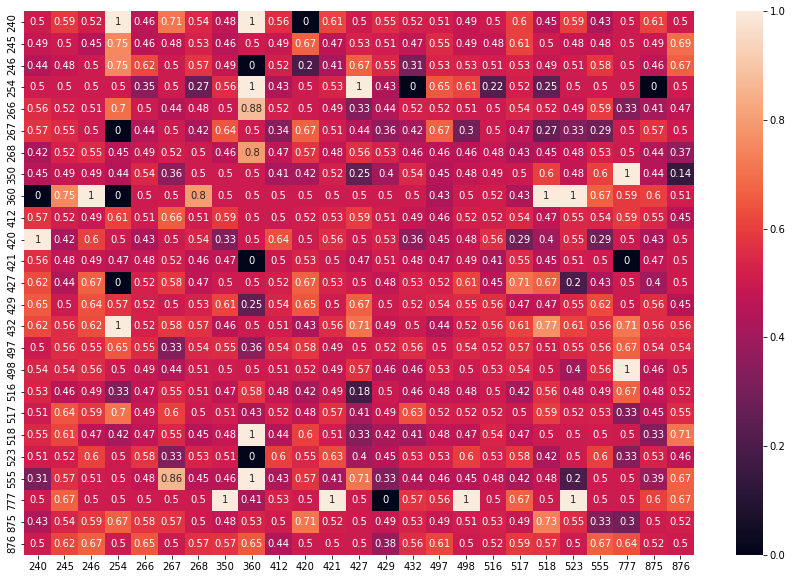

In [122]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize=(15,10))  
sns.heatmap(champions_won_percentage_imputed.loc[240:, 240:], annot=True)#, cmap='RdYlGn_r')
#champions_synergy.style.background_gradient(cmap='Blues')

In [123]:
game_id_unique[:2]

array(['2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1',
       '2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_2'],
      dtype=object)

In [223]:
test_broadcasting = df_BLUE
test_broadcasting

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id
0,MapleSnow,181619.0,TOP,Ryze,13,4468.0,9.0,0.0,9469,158,1,7,8,0,7285,92285,True,BLUE,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,DinTer,151736.0,JGL,Rek'Sai,421,4519.0,14.0,0.0,9211,79,1,55,13,0,20433,96279,True,BLUE,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,Chillyz,124304.0,MID,Ezreal,81,4884.0,14.0,1.0,11160,177,6,15,8,1,9621,116577,True,BLUE,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,GodKwai,162689.0,BOT,Kalista,429,5587.0,13.0,0.0,12092,197,9,22,4,0,6639,124071,True,BLUE,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,Olleh,187483.0,SUP,Thresh,412,3808.0,14.0,1.0,7874,28,2,0,12,1,8481,23867,True,BLUE,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141265,Aoi Haru,189943.0,TOP,Ornn,516,4280.0,6.0,3.0,8723,210,0,5,6,3,22373,114655,False,BLUE,LCL/2020 Season/Spring Season/Scoreboards_2_1
141266,ItsCortez,242042.0,JGL,Jarvan IV,59,4492.0,11.0,2.0,8920,140,3,99,8,2,23790,138323,False,BLUE,LCL/2020 Season/Spring Season/Scoreboards_2_1
141267,Paranoia,191244.0,MID,Zoe,142,5671.0,7.0,7.0,10630,196,6,7,1,7,15036,118485,False,BLUE,LCL/2020 Season/Spring Season/Scoreboards_2_1
141268,LeX,178143.0,BOT,Ezreal,81,4867.0,8.0,3.0,10605,242,1,8,7,3,9184,138740,False,BLUE,LCL/2020 Season/Spring Season/Scoreboards_2_1


In [224]:
test_broadcasting['champion_id'].values #-test_broadcasting['champion_id'].values[:, None]

array([ 13, 421,  81, ..., 142,  81, 201])

In [227]:
result_df_broadcasting = test_broadcasting[['game_id', 'champion_id']].groupby(['game_id']).aggregate({
    #'champion_id': lambda z: ' '.join(str(x)+'+'+str(y) for x in z for y in z if x != y), 
    'champion_id': lambda z: [champions_won_percentage_imputed.loc[x][y] for x in z for y in z if x != y]
})
result_df_broadcasting

,champion_id
game_id,
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1,"[0.5094637223974764, 0.5150501672240803, 0.504..."
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_2,"[0.4957983193277311, 0.4976228209191759, 0.509..."
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_3,"[0.48816029143898, 0.5213675213675214, 0.47770..."
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_1,"[0.48816029143898, 0.5213675213675214, 0.47770..."
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_2,"[0.4623376623376623, 0.5333333333333333, 0.486..."
...,...
XLG SuperCup 2016/Scoreboards_4_2,"[0.5112219451371571, 0.48185483870967744, 0.50..."
XLG SuperCup 2016/Scoreboards_5_1,"[0.5149700598802395, 0.5291970802919708, 0.494..."
XLG SuperCup 2016/Scoreboards_5_2,"[0.4954128440366973, 0.4751552795031056, 0.493..."


In [228]:
result_df_broadcasting.champion_id[0], len(result_df_broadcasting.champion_id[0])

([0.5094637223974764,
  0.5150501672240803,
  0.5045592705167173,
  0.4904831625183016,
  0.5047318611987381,
  0.5183823529411765,
  0.484393063583815,
  0.46099290780141844,
  0.5484949832775919,
  0.5,
  0.5007235890014472,
  0.5223880597014925,
  0.48834853090172237,
  0.47398843930635837,
  0.4703328509406657,
  0.5274725274725275,
  0.5300146412884333,
  0.508274231678487,
  0.48955223880597015,
  0.4908424908424908],
 20)

In [235]:
result_df_broadcasting['mean_value'] = result_df_broadcasting.champion_id.apply(lambda x: sum(x)/20)
result_df_broadcasting

,champion_id,mean_value
game_id,,
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1,"[0.5094637223974764, 0.5150501672240803, 0.504...",0.501924
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_2,"[0.4957983193277311, 0.4976228209191759, 0.509...",0.499898
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_3,"[0.48816029143898, 0.5213675213675214, 0.47770...",0.524753
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_1,"[0.48816029143898, 0.5213675213675214, 0.47770...",0.521355
2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_2,"[0.4623376623376623, 0.5333333333333333, 0.486...",0.495574
...,...,...
XLG SuperCup 2016/Scoreboards_4_2,"[0.5112219451371571, 0.48185483870967744, 0.50...",0.491673
XLG SuperCup 2016/Scoreboards_5_1,"[0.5149700598802395, 0.5291970802919708, 0.494...",0.496189
XLG SuperCup 2016/Scoreboards_5_2,"[0.4954128440366973, 0.4751552795031056, 0.493...",0.507564


## Average win rate of the champions against the opposite champions

### Win rate of champions against each of the other team's champion

In [257]:
#available_champions = list(df_frequency.index)
df_BLUE_RED = pd.merge(left=df_BLUE, right=df_RED, left_on= 'game_id', right_on= 'game_id')
df = df_BLUE_RED[['champion_id_x', 'role_x', 'role_y', 'champion_id_y', 'win_x', 'game_id']]#.groupby('champion_id_x').value_counts()
df.head()

,champion_id_x,role_x,role_y,champion_id_y,win_x,game_id
0,13,TOP,TOP,54,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,13,TOP,JGL,203,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,13,TOP,MID,38,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,13,TOP,BOT,18,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,13,TOP,SUP,12,True,LMS/2016 Season/Spring Season/Scoreboards_3_2


In [258]:
#times that a given champion won or lost against another champion
champion_vs_champion = pd.DataFrame(df[['champion_id_x', 'role_x', 'role_y', 'champion_id_y', 'win_x']].value_counts())
champion_vs_champion

0
champion_id_x role_x role_y champion_id_y win_x     
12            SUP    SUP    201           True   372
201           SUP    SUP    12            True   337
412           SUP    SUP    201           True   318
201           SUP    SUP    12            False  317
12            SUP    SUP    201           False  307
...                                              ...
84            MID    SUP    1             True     1
                            9             True     1
                            16            True     1
                            22            False    1
876           TOP    TOP    126           True     1

[80903 rows x 1 columns]

In [259]:
champion_vs_champion.loc[(12, 'SUP', 'SUP')]

/tmp/ipykernel_5344/916911332.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  champion_vs_champion.loc[(12, 'SUP', 'SUP')]


0
champion_id_y win_x     
201           True   372
              False  307
412           True   126
497           True   121
412           False  112
...                  ...
63            True     1
80            False    1
81            True     1
85            False    1
              True     1

[82 rows x 1 columns]

In [260]:
total_champion_vs_champion = pd.DataFrame(df_BLUE_RED[['champion_id_x', 'role_x', 'role_y', 'champion_id_y']].value_counts())
total_champion_vs_champion

0
champion_id_x role_x role_y champion_id_y     
12            SUP    SUP    201            679
201           SUP    SUP    12             654
                            412            574
412           SUP    SUP    201            555
201           SUP    BOT    81             522
...                                        ...
114           TOP    BOT    63               1
58            MID    MID    91               1
                            61               1
163           MID    TOP    38               1
202           BOT    SUP    81               1

[51883 rows x 1 columns]

In [261]:
#percentage of times that a champion has lost or won against another champion
rate_champion_vs_champion = champion_vs_champion.div(total_champion_vs_champion)
rate_champion_vs_champion

0
champion_id_x role_x role_y champion_id_y win_x     
1             MID    BOT    21            False  1.0
                            51            False  1.0
                            235           True   1.0
                            429           False  1.0
                            498           False  0.5
...                                              ...
876           TOP    SUP    111           True   1.0
                            432           False  1.0
                     TOP    58            False  1.0
                            126           False  0.5
                                          True   0.5

[80903 rows x 1 columns]

In [262]:
rate_champion_vs_champion.loc[12, 'BOT']

,,,0
role_y,champion_id_y,win_x,
BOT,81,False,1.0
JGL,48,False,1.0
MID,50,False,1.0
SUP,25,False,1.0
TOP,114,False,1.0


In [265]:
#get the mean value of the pairwise combination of champions synergy
df[df['role_x'] == df['role_y']].aggregate({
  'champion_id_x': lambda z: [z]#champions_won_percentage_imputed.loc[x][y] for x in z for y in z if x != y]
})
#result_Synergy['mean_synergy_'+str(name)] = result_Synergy.champion_id.apply(lambda x: sum(x)/len(x))
#result_Synergy.drop('champion_id', axis=1)

,champion_id_x
0,[13]
6,[421]
12,[81]
18,[429]
24,[412]
...,...
706325,[516]
706331,[59]
706337,[142]
706343,[81]


In [45]:
rate_champion_vs_champion.loc[(12)]
####win rate per againts a champion against the champion of the other team in the same role
##played with the same role (keep an eye!)

0
champion_id_y win_x          
1             True   0.666667
              False  0.333333
2             True   0.650000
              False  0.350000
3             False  0.529412
...                       ...
777           False  0.500000
875           True   0.707317
              False  0.292683
876           False  0.518182
              True   0.481818

[293 rows x 1 columns]

In [46]:
float(rate_champion_vs_champion.loc[(12, 201, True)])

0.5520833333333334

### Blue Champions average win rate against each of the 5 red champions (later averaged per game_id)

In [47]:
champion_x = list(df_BLUE_RED.champion_id_x)
champion_y = list(df_BLUE_RED.champion_id_y)

column1 = []
column2 = []
column3 = []
column4 = []
column5 = []

for num in range(int(len(champion_x)/5)):
    try:
        column1.append(float(rate_champion_vs_champion.loc[(champion_x[5*num], champion_y[5*num], True)]))
    except:
        column1.append(0)
    try:
        column2.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+1], champion_y[5*num+1], True)]))
    except:    
        column2.append(0)
    try:
        column3.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+2], champion_y[5*num+2], True)]))
    except:
        column3.append(0)
    try:
        column4.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+3], champion_y[5*num+3], True)]))
    except:
        column4.append(0)
    try:
        column5.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+4], champion_y[5*num+4], True)]))
    except:
        column5.append(0)

        
"""This cell returns each blue champion winning rate per 5 of the red team champions"""
win_rate_champion_vs_champion = pd.DataFrame(np.array([column1, column2, column3, column4, column5]).T, columns=['rate_champion_1', 'rate_champion_2', 'rate_champion_3', 'rate_champion_4', 'rate_champion_5'])
win_rate_champion_vs_champion['blue_champ_id'] = df_BLUE_RED.champion_id_x

In [49]:
"""This cell returns each blue champion avergage winning rate for the 5 champions in the red team"""
win_rate_champion_vs_champion.mean(axis=1)

0         6.384466
1         6.382893
2         6.497394
3         6.426222
4         6.424693
            ...   
141275    1.473143
141276    1.440393
141277    1.415992
141278    1.425620
141279    1.447481
Length: 141280, dtype: float64

In [50]:
"""Inlcude the average win rate of every blue champion against the 5 champions in the red team"""
df_banana = pd.merge(df_BLUE, win_rate_champion_vs_champion, left_index=True, right_index=True)
df_banana[['champion_name', 'champion_id', 'rate_champion_1','rate_champion_2','rate_champion_3','rate_champion_4','rate_champion_5']]

,champion_name,champion_id,rate_champion_1,rate_champion_2,rate_champion_3,rate_champion_4,rate_champion_5
0,Dr. Mundo,36,0.363636,0.470588,0.564103,0.434783,0.473684
1,Xin Zhao,5,0.433333,0.450000,0.500000,0.384615,0.529412
2,Cassiopeia,69,0.537037,0.556522,0.515152,0.680000,0.695652
3,Ezreal,81,0.492063,0.584718,0.455000,0.460526,0.565022
4,Morgana,25,0.479167,0.637168,0.506849,0.442623,0.482353
...,...,...,...,...,...,...,...
141275,Gangplank,41,0.689655,0.586667,0.434783,0.538012,0.589744
141276,Sejuani,113,0.550000,0.521277,0.496855,0.490066,0.584158
141277,Corki,42,0.480769,0.488584,0.526882,0.527273,0.472441
141278,Sivir,15,0.524590,0.438017,0.578947,0.472340,0.539823


In [51]:
df_BLUE_win_rate = pd.merge(df_BLUE, pd.DataFrame(win_rate_champion_vs_champion.mean(axis=1)), left_index=True, right_index=True)
df_BLUE_win_rate#[['champion_name', 'champion_id', 0]]

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id,0
0,LukasNegro,180733.0,TOP,Dr. Mundo,36,4860.0,4.0,4.0,9920,246,0,1,4,4,27971,114533,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.384466
1,Rod,196384.0,JGL,Xin Zhao,5,4508.0,5.0,2.0,9386,181,1,151,4,2,24232,146123,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.382893
2,Rakyz,194807.0,MID,Cassiopeia,69,4851.0,1.0,3.0,12262,310,1,28,0,3,21271,182752,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.497394
3,Warangelus,203963.0,BOT,Ezreal,81,6362.0,6.0,4.0,12160,280,2,15,4,4,14588,173127,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.426222
4,Shadow,212989.0,SUP,Morgana,25,3639.0,6.0,4.0,7527,21,2,0,4,4,13196,40300,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.424693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141275,Khan,171549.0,TOP,Gangplank,41,4369.0,4.0,6.0,13628,291,0,8,4,6,28847,272147,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.473143
141276,Clid,126245.0,JGL,Sejuani,113,4704.0,5.0,4.0,10770,150,2,123,3,4,25724,123159,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.440393
141277,Faker,158918.0,MID,Corki,42,5234.0,3.0,2.0,15381,384,1,38,2,2,16005,259670,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.415992
141278,Teddy,200789.0,BOT,Sivir,15,5448.0,4.0,2.0,16986,426,2,39,2,2,14173,321584,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.425620


In [52]:
df_BLUE_mean_win_rate = df_BLUE_win_rate[['game_id', 0]].groupby('game_id').mean()
df_BLUE_mean_win_rate.reset_index(level=0, inplace=True)
df_BLUE_mean_win_rate['champion_vs_champion_mean_win_rate'] = df_BLUE_mean_win_rate[0]
df_BLUE_mean_win_rate.drop(0, axis=1, inplace=True)
df_BLUE_mean_win_rate.head(10)

,game_id,champion_vs_champion_mean_win_rate
0,2016 International Wildcard Invitational/Score...,37.604190
1,2016 International Wildcard Invitational/Score...,18.123818
2,2016 International Wildcard Invitational/Score...,13.925812
3,2016 International Wildcard Invitational/Score...,13.126628
4,2016 International Wildcard Invitational/Score...,13.978497
5,2016 International Wildcard Invitational/Score...,2.460013
6,2016 International Wildcard Invitational/Score...,0.798985
7,2016 International Wildcard Invitational/Score...,69.132323
8,2016 International Wildcard Invitational/Score...,58.794709
9,2016 International Wildcard Invitational/Score...,1.804435


# ML model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config; set_config(display='diagram')


# Impute then Scale for numerical variables: 
num_transformer = make_pipeline(
                    SimpleImputer(strategy = 'mean'),
                    MinMaxScaler())

# Encode categorical variables
cat_transformer = OneHotEncoder(sparse = False)#, handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough')

#add model
pipe = make_pipeline(preproc, LogisticRegression(solver='liblinear'))
pipe

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_normalized_teams.winner).transform(df_normalized_teams.winner)
X_pre = df_BLUE.drop(['name', 'id', 'win', 'champion_id', 'side'], axis=1).groupby('game_id').sum()
X = X_pre

In [ ]:
X.info()

In [ ]:
df_BLUE.info()

In [ ]:
# Train pipeline
pipe.fit(X_train,y_train)

# Score model
pipe.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validate pipeline
cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

In [ ]:
# Check predictions
pipe.predict(X_test.iloc[0:5]), y_test[0:5]

In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 

In [ ]:
np.unique(predicted)

In [ ]:
model = pipe[-1]

In [ ]:
model.coef_